# Study of the single Input Features

In [2]:
%matplotlib inline
import numpy as np
import os
import matplotlib.pyplot as plt
import h5py
import tables
#import matplotlib.patches as mpatches
#from matplotlib import gridspec

#### at the moment we study the features acording to one hdf file

In [3]:
DATA_DIR = "/scratch9/mkron/data/training_data/second_dataset"
current_file = "File_0.h5"
file = h5py.File(os.path.join(DATA_DIR, current_file), "r")

In [4]:
file.keys()

[u'av_time_charges',
 u'charge',
 u'charge_100ns',
 u'charge_500ns',
 u'first_charge',
 u'num_pulses',
 u'reco_vals',
 u'time',
 u'time_20pct',
 u'time_50pct',
 u'time_kurtosis',
 u'time_moment_2',
 u'time_quartercharge',
 u'time_spread']

In [5]:
depositedE = file["reco_vals"]["depositedE"]

## Input of Branch "Total deposited Energy of one event" (1D)

In [6]:
# charge as saved in HDF file
# sum of charge per DOM
charge = file["charge"] # one element, like file["charge"][i], is given the network as input
#charge = charge[:20000]

In [7]:
# In an additional branch we input the sum of deposited energy to counter the normalization
total_charge_event = np.sum(np.sum(np.sum(charge, axis=1), axis=1), axis=1)

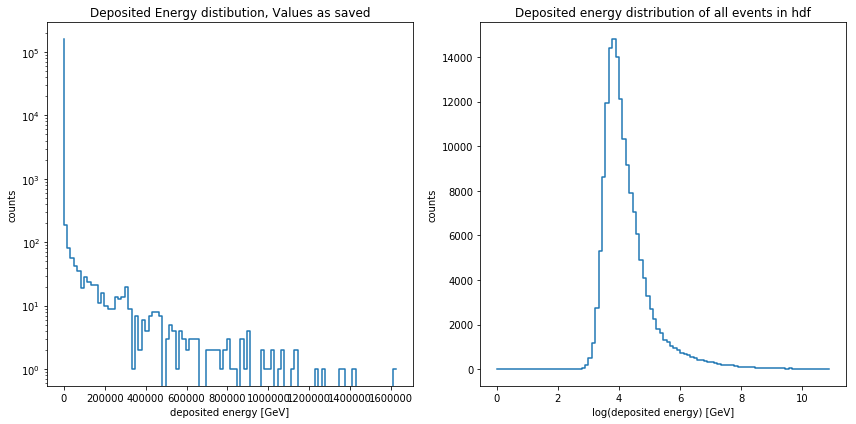

In [8]:
# histogramm of total charge of the data
binnumber = 100

fig = plt.figure(figsize=(12,6))
ax1 = plt.subplot2grid((1, 2), (0, 0))
ibins = np.linspace(0,np.max(total_charge_event),binnumber)
vals, bins = np.histogram(total_charge_event, bins=ibins)
ax1.semilogy(bins[:-1], vals , drawstyle='steps-pre')
ax1.set_title("Deposited Energy distibution, Values as saved")
ax1.set_xlabel('deposited energy [GeV]')
ax1.set_ylabel('counts')


ax2 = plt.subplot2grid((1, 2), (0, 1))
ibins_log = np.linspace(0,11,binnumber)
vals_log, bins_log = np.histogram(np.log(total_charge_event), bins=ibins_log)
ax2.plot(bins_log[:-1], vals_log , drawstyle='steps-pre')
ax2.set_title("Deposited Energy distibution, Values in log scale")
ax2.set_xlabel('log(deposited energy) [GeV]')
ax2.set_ylabel('counts')

plt.title("Deposited energy distribution of all events in hdf")
plt.tight_layout()
plt.show()

#### -> we should transform the input with a log

## Input of Branch "Time Spread of one event" (1D)

In [3]:
# time as saved in HDF file
time = file["time"] # one element, like file["time"][i], is given the network as input
time = time[:20000]

In [4]:
# calculate the time spread of one event
time_spread_event= []
for i in xrange(len(time)):
    x = time[i]
    delta = np.log(np.max(x)-np.min(x))
    time_spread_event.append(delta)

In [5]:
print np.max(time_spread_event)
print np.min(time_spread_event)

11.2110903761
9.33547410273


[   26  5279 11858  1101   598    14   120   305   423   276]


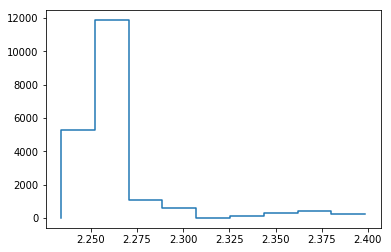

In [8]:
#ibins = np.linspace(0,np.max(total_charge),binnumber)
vals, bins = np.histogram(np.log(time_spread_event)) #, bins=ibins)
print vals
plt.plot(bins[:-1], vals , drawstyle='steps-pre')


In [11]:
np.log(100)

4.6051701859880918

In [ ]:
time_spread = file["time_spread"]
time_spread.shape

In [ ]:
len(file["charge"][:20])
x= np.sum(file["charge"][0])
print x
y = np.sum(file["charge"][:20], axis=1)
print y[0]
print len(y)

### num_pulses

In [61]:
pulses = file["num_pulses"]
pulses_of_event = pulses[4]
list_pulses_of_event = pulses_of_event.reshape(1,-1)[0]

In [62]:
int(np.max(list_pulses_of_event))

4

In [63]:
# values that are not 0
biggerZero= list_pulses_of_event[list_pulses_of_event >0]
len(biggerZero)

43

In [64]:
vals, bins = np.histogram(biggerZero, bins= int(np.max(list_pulses_of_event)))
print vals
#plt.plot(bins[:-1], vals)



[38  4  0  1]
